# 1. Import libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np 

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Prepare dataset

# 2.1 Import and read data

In [2]:
data = pd.read_csv("Titanic_train.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# 2.2 Drop unwanted columns 

In [3]:
# Drop PassengerId, Name, Ticket and Cabin columns 

data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

# 2.3 Drop rows with missing Embarked values

In [4]:
# Missing data

missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
missing

Age         177
Embarked      2
dtype: int64

In [5]:
# Drop rows with missing Embarked values 

print("Before: ", data.shape)
data = data.loc[data['Embarked'].notnull(), :]
print("After: ", data.shape)

Before:  (891, 8)
After:  (889, 8)


In [6]:
# Check missing values again

missing = data.isnull().sum()
missing[missing > 0]

Age    177
dtype: int64

# 3. Explore Age feature

Before we perform imputation on the Age column, let's briefly explore the Age feature. 

Text(0.5, 1, 'Correlation between features')

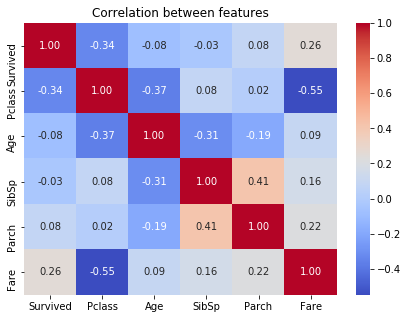

In [7]:
# Plot heatmap 

correlation = data.corr()
plt.figure(figsize = (7, 5))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation between features')

In [8]:
# Age correlation with other features 

correlation['Age'].sort_values(ascending = False)[1:]

Fare        0.093143
Survived   -0.082446
Parch      -0.187896
SibSp      -0.307351
Pclass     -0.365902
Name: Age, dtype: float64

Text(0.5, 1.0, 'Passenger Age Distribution')

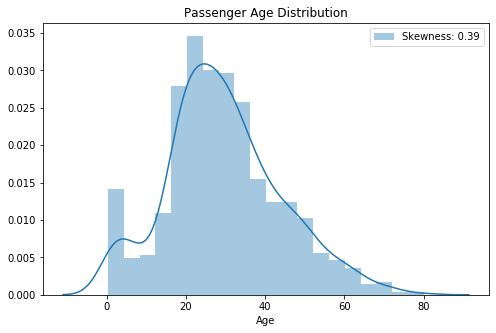

In [9]:
# Plot passenger age distribution

plt.figure(figsize = (8, 5))
sns.distplot(data['Age'], label = 'Skewness: {:.2f}'.format(data['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

In [10]:
# Age summary statistics 

data['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# 4. Missing values imputation

In this section, we will look at 3 different imputation techniques:

1. Simple imputer
2. Iterative imputer
3. KNN Imputer



In [11]:
# Create sample dataframe

df = pd.DataFrame({'SibSp': [1, 1, 0, 1, 0, 0], 
                   'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583], 
                   'Age': [22, 38, 26, 35, 35, np.nan]})
df

SibSp     Fare   Age
0      1   7.2500  22.0
1      1  71.2833  38.0
2      0   7.9250  26.0
3      1  53.1000  35.0
4      0   8.0500  35.0
5      0   8.4583   NaN

# 4.1 Simple imputer



In [12]:
print("Average age: ", df['Age'].mean())
simple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
simple_imp.fit_transform(df)

Average age:  31.2


array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 31.2   ]])

In [13]:
iterative_imp = IterativeImputer()
iterative_imp.fit_transform(df)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

# 4.3 KNN imputer



In [14]:
knn_imp = KNNImputer(n_neighbors = 2)
knn_imp.fit_transform(df)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

As a result, KNN imputer has taken row 3 and row 5 as the nearest observations for row 6.

Therefore, the average age between row 3 and row 5 is (26 + 35) / 2 = 30.5. 

# 5. Model accuracy under simple imputer and iterative imputer



In [15]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [16]:
# Get predictor and target variables 

X = data.drop('Survived', axis = 1)
Y = data['Survived']

In [17]:
# Predictor and target variables shape

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (889, 7)
Y shape:  (889,)


# 5.1 Univariate imputation (simple imputer)

In [18]:
# Instantiate OneHotEncoder for Sex and Embarked columns
ohe = OneHotEncoder()

# Instantiate simple imputer 
simple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Instantiate model
rf = RandomForestClassifier()

# Make column transformer with simple imputer
column_transform = make_column_transformer(
    (ohe, ['Sex', 'Embarked']),
    (simple_imp, ['Age']),
    remainder = 'passthrough')

# Pipeline
pipe = make_pipeline(column_transform, rf)

# 10-fold cross-validation
cross_val_score(pipe, X, Y, cv = 10, scoring = 'accuracy').mean()

0.8043156281920327

# 5.2 Multivariate imputation (iterative imputer)

In [19]:
# Instantiate OneHotEncoder for Sex and Embarked columns
ohe = OneHotEncoder()

# Instantiate iterative imputer
iterative_imp = IterativeImputer()

# Instantiate model
rf = RandomForestClassifier()

# Make column transformer with iterative imputer
column_transform = make_column_transformer(
    (ohe, ['Sex', 'Embarked']),
    (iterative_imp, ['Age']),
    remainder = 'passthrough')

# Pipeline
pipe = make_pipeline(column_transform, rf)

# 10-fold cross-validation 
cross_val_score(pipe, X, Y, cv = 10, scoring = 'accuracy').mean()

0.8099336057201226